In [3]:
import torch
from torch import nn
from torch.autograd import Variable
from torch import optim
import torch.nn.functional as F
import pandas as pd
import numpy as np
data_csv = pd.read_csv('prices.csv', usecols=[1])
dataset=data_csv.values.tolist()[int(len(data_csv)*.75):]
dataset=[i[0] for i in dataset]
dataset=dataset[int(.5*len(dataset)):-3]
onlineset=dataset
past_day=pd.read_csv('past_day.csv', usecols=[1])
past_day=past_day.values.tolist()
past_day=[i[0] for i in past_day]
past_day=past_day[:-3]
amazon=pd.read_csv('amazon.csv', usecols=[1])
amazon=amazon.values.tolist()
amazon=[i[0] for i in amazon[1:]]
amazon.reverse()
facebook=pd.read_csv('facebook.csv', usecols=[1])
facebook=facebook.values.tolist()
#print(facebook[0])
facebook=[i[0] for i in facebook[1:]]
facebook.reverse()
apple=pd.read_csv('apple.csv', usecols=[1])
apple=apple.values.tolist()

apple=[i[0] for i in apple[1:]]
apple.reverse()

#print(past_day)
#print(dataset)


get all data


In [20]:
import matplotlib.pyplot as plt
#want x to be seq_lenx1x1
max_value = np.max(dataset)
min_value = np.min(dataset)
scalar = max_value - min_value
dataset = list(map(lambda x: x / scalar, dataset))    
data_X=dataset

train_size = int(len(data_X) * 0.7)
test_size = len(data_X) - train_size
train_X_raw = data_X[:train_size]

test_X_raw = data_X[train_size:]

def make_sliding_window(X,window):
    X_slide=[[price for price in X[:window]]]
    y_slide=[X[window]]
    for i in range(1,(len(X)-(window+1))):
        X_slide.append([price for price in X[i:window+i]])
        y_slide.append(X[window+i])
    return X_slide,y_slide
window=50
train_X,train_Y=make_sliding_window(train_X_raw,window)
test_X,test_Y=make_sliding_window(test_X_raw,window)


    
    



NameError: name 'dataset' is not defined

In [11]:

import torch.nn.functional as F
class standard_predictor(nn.Module):
    def __init__(self, input_size):
        super(standard_predictor, self).__init__()
#         self.lins=[nn.Linear(input_size, hidden_sizes[0])]
#         for i,hidden_size in enumerate(hidden_sizes[1:]):
#             self.lins.append(nn.Linear(hidden_sizes[i-1],hidden_size))
#         self.lins.append(nn.Linear(hidden_sizes[-1],1))
        self.lin1=nn.Linear(input_size,50)
        self.lin2=nn.Linear(50,60)
        self.lin3=nn.Linear(60,70)
        self.lin4=nn.Linear(70,80)
        self.lin5=nn.Linear(80,1)
    def forward(self,x):
#         for lin in self.lins[:-1]:
#           x=F.relu(lin(x))
#         x=self.lins[-1](x)
        x=F.relu(self.lin1(x))
        x=F.relu(self.lin2(x))
        x=F.relu(self.lin3(x))
        x=F.relu(self.lin4(x))
        x=self.lin5(x)
        return x

criterion = nn.MSELoss()
net=standard_predictor(window)
optimizer=torch.optim.SGD(net.parameters(),lr=.05)
for e in range(1000):
    var_x = Variable(torch.FloatTensor(train_X))
    var_y = Variable(torch.FloatTensor(train_Y))
    var_y=var_y.view(var_y.shape[0],1)
    running_loss=0
    for x,y in zip(var_x,var_y):
        out=net(x)
        loss=criterion(out,y)
        if e==999:
            print(out,y)
            #plt.plot(out.detach().numpy(),y.detach().numpy())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss+=loss.data[0]
    if (e + 1) % 10 == 0: 
        print('Epoch: {}, Loss: {:.5f}'.format(e + 1, running_loss))
#plt.show()
        
    
        
    
        
        
        
    

/Users/rishipuri/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:43: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch: 10, Loss: 0.73989
Epoch: 20, Loss: 0.62636
Epoch: 30, Loss: 0.58097
Epoch: 40, Loss: 0.47846
Epoch: 50, Loss: 0.41015
Epoch: 60, Loss: 0.35942
Epoch: 70, Loss: 0.33402
Epoch: 80, Loss: 0.33708
Epoch: 90, Loss: 0.34433
Epoch: 100, Loss: 0.32593
Epoch: 110, Loss: 0.31357
Epoch: 120, Loss: 0.28842
Epoch: 130, Loss: 0.27533
Epoch: 140, Loss: 0.26484
Epoch: 150, Loss: 0.25595
Epoch: 160, Loss: 0.26110
Epoch: 170, Loss: 0.25354
Epoch: 180, Loss: 0.24131
Epoch: 190, Loss: 0.22847
Epoch: 200, Loss: 0.22229
Epoch: 210, Loss: 0.21921
Epoch: 220, Loss: 0.20895
Epoch: 230, Loss: 0.20946
Epoch: 240, Loss: 0.20113
Epoch: 250, Loss: 0.19747
Epoch: 260, Loss: 0.19457
Epoch: 270, Loss: 0.19057
Epoch: 280, Loss: 0.18191
Epoch: 290, Loss: 0.17875
Epoch: 300, Loss: 0.18274
Epoch: 310, Loss: 0.17090
Epoch: 320, Loss: 0.16810
Epoch: 330, Loss: 0.16569
Epoch: 340, Loss: 0.16131
Epoch: 350, Loss: 0.15728
Epoch: 360, Loss: 0.15526
Epoch: 370, Loss: 0.15420
Epoch: 380, Loss: 0.14974
Epoch: 390, Loss: 0.1

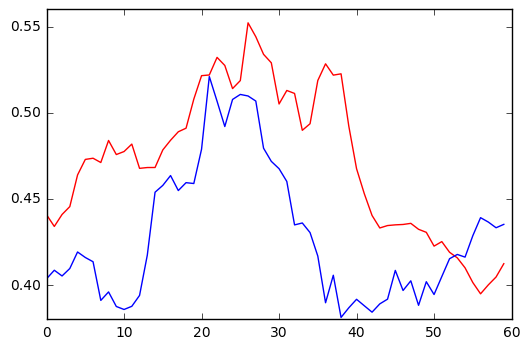

In [12]:
testvar_x = Variable(torch.FloatTensor((test_X)))
testvar_y = Variable(torch.FloatTensor((test_Y)))
testvar_y=testvar_y.view(testvar_y.shape[0],1)
out = net(testvar_x)
out=out.view(out.shape[0])
plt.plot(out.detach().numpy(),color='red')


plt.plot(test_Y)
plt.show()   

doesnt really work too well

In [13]:

# class lstm_reg(nn.Module):
#     def __init__(self, input_size, hidden_size, output_size=1, num_layers=1):
#         super(lstm_reg, self).__init__()
        
#         self.rnn = nn.LSTM(input_size, hidden_size, num_layers) # rnn
#         self.reg = nn.Linear(hidden_size, output_size) # 回归
        
#     def forward(self, x):
#         s= x.shape[0]
#         x=x.view(s,1,-1)
#         x, _ = self.rnn(x) # (seq, batch, hidden)
#         s, b, h = x.shape
#         #x = x.view(s, h) 
#         x = self.reg(x)
#         #x = x.view(s)
#         return x
# #declare model input size 1, hidden size 30
# hidden_size=200
# net = lstm_reg(window, hidden_size)
# #mseloss
# criterion = nn.MSELoss()
# #adam optimizer
# optimizer = torch.optim.Adam(net.parameters(), lr=.7)
# #train
# # h0=torch.FloatTensor(np.full((1,1,hidden_size),train_X[1]))
# # c0=torch.FloatTensor(np.full((1,1,hidden_size),train_X[1]))
# for e in range(2000):
    
#     var_x = Variable(torch.FloatTensor(train_X))
#     var_y = Variable(torch.FloatTensor(train_Y))
#     var_y=var_y.view(var_y.shape[0],1,-1)
#     #print(var_x.shape)
    
#     #print(var_x.shape)
#     out = net(var_x)
#     loss = criterion(out, var_y)
    
#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()
#     if (e + 1) % 10 == 0: 
#         print('Epoch: {}, Loss: {:.5f}'.format(e + 1, loss.data[0]))
        
# #now trained try to predict the validation series
# # h0=torch.FloatTensor(np.full((1,1,30),test_X[1]))
# # c0=torch.FloatTensor(np.full((1,1,30),test_X[1]))
# testvar_x = Variable(torch.FloatTensor((test_X)))
# testvar_y = Variable(torch.FloatTensor((test_Y)))
# testvar_y=testvar_y.view(testvar_y.shape[0],1,-1)
# out = net(testvar_x)
# loss = criterion(out, testvar_y)
# out=out.view(out.shape[0])
# plt.plot(out.detach().numpy())

# plt.show()
# plt.plot(test_Y)
# plt.show()       


# TLS VS RIDGE Reg

[0.00044306] 37 21


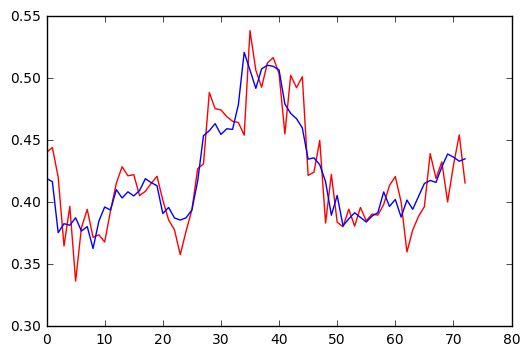

[0.00011721] 89 0.05


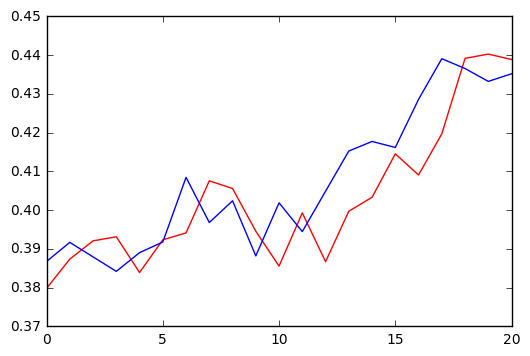

In [8]:
def getW_tls(X,y,d):
    X=np.array(X)
    y=np.array(y)
    y=y.reshape(y.shape[0],1)
#     print(X.shape)
#     print(y.shape)
    xy=np.concatenate((X,y),axis=1)
    u,s,v=np.linalg.svd(xy)
    XTX=X.T.dot(X)
    invertible=(XTX-(s[d]**2)*np.eye((XTX).shape[0],(XTX).shape[1]))
    inverted=np.linalg.inv(invertible)
    w=(inverted.dot(X.T)).dot(y)
    
    return w
def getW_ridge(X,y,lambda_):
    X=np.array(X)
    y=np.array(y)
    y=y.reshape(y.shape[0],1)
#     print(X.shape)
#     print(y.shape)
    xy=np.concatenate((X,y),axis=1)
    u,s,v=np.linalg.svd(xy)
    XTX=X.T.dot(X)
    invertible=(XTX+lambda_*np.eye((XTX).shape[0],(XTX).shape[1]))
    inverted=np.linalg.inv(invertible)
    w=(inverted.dot(X.T)).dot(y)
    return w
    
def fit(X,w,y):
    X=np.array(X)
    y_est=X.dot(w)
    loss=0
    for i,y_est_i in enumerate(y_est):
        loss+=(y_est_i-y[i])**2
    loss/=len(y_est)
    return y_est,loss
bestloss=9999
best_y_est=None
def make_sliding_window(X,window):
    X_slide=[[price for price in X[:window]]]
    y_slide=[X[window]]
    for i in range(1,(len(X)-(window+1))):
        X_slide.append([price for price in X[i:window+i]])
        y_slide.append(X[window+i])
    return X_slide,y_slide

best_window=0
best_y_test=None
bestd=0
for window in range(30,100):
    train_X,train_Y=make_sliding_window(train_X_raw,window)
    test_X,test_Y=make_sliding_window(test_X_raw,window)
    for d in range(window-1):
    

        w_tls=getW_tls(train_X,train_Y,d)
        
        y_est,loss=fit(test_X,w_tls,test_Y)
        if loss<bestloss:
            bestloss=loss
            bestd=d
            bestwindow=window
            best_y_est=y_est
            best_y_test=test_Y
            
        
print(bestloss,bestwindow,bestd)
plt.plot(best_y_est,color='red')
plt.plot(best_y_test)


plt.show()

bestloss=9999
best_y_est=None


best_window=0
best_y_test=None
bestd=0
for window in range(30,100):
    train_X,train_Y=make_sliding_window(train_X_raw,window)
    test_X,test_Y=make_sliding_window(test_X_raw,window)
    for lambda_ in [float(i)/100 for i in range(5,100)]:
    

        w_ridge=getW_ridge(train_X,train_Y,lambda_)
        
        y_est,loss=fit(test_X,w_ridge,test_Y)
        if loss<bestloss:
            bestloss=loss
            bestlam=lambda_
            bestwindow=window
            best_y_est=y_est
            best_y_test=test_Y
            
print(bestloss,bestwindow,bestlam)
plt.plot(best_y_est,color='red')
plt.plot(best_y_test)


plt.show()


    

### 

# Multiplicative Weight Updates

In [24]:
import ssl
import pandas as pd
ssl._create_default_https_context = ssl._create_unverified_context

def CryptoData(symbol, frequency):
    #Params: String symbol, int frequency = 300,900,1800,7200,14400,86400
    #Returns: df from first available date
    url ='https://poloniex.com/public?command=returnChartData&currencyPair='+symbol+'&end=9999999999&period='+str(frequency)+'&start=0'
    #print(url)
    df = pd.read_json(url)
    df.set_index('date',inplace=True)
    return df
btc= CryptoData('USDT_BTC', 86400)['close'][-365:-1].values
btc=btc.reshape(btc.shape[0],-1)
# eth=CryptoData('USDT_ETH', 86400)['close'][-365:-1].values
# eth=eth.reshape(eth.shape[0],-1)
# lite=CryptoData('USDT_LTC', 86400)['close'][-365:-1].values
# lite=lite.reshape(lite.shape[0],-1)
prices_btc=btc
#prices_btc=np.concatenate((btc),axis=1)
print(prices_btc)

[[ 6009.33864396]
 [ 5963.68434001]
 [ 5899.99999999]
 [ 5508.76      ]
 [ 5709.31000001]
 [ 5880.00000001]
 [ 5756.51178353]
 [ 5719.        ]
 [ 6155.        ]
 [ 6125.        ]
 [ 6450.02162843]
 [ 6739.791199  ]
 [ 7025.        ]
 [ 7124.35999982]
 [ 7365.99999999]
 [ 7379.16813705]
 [ 6929.97042124]
 [ 7084.87344467]
 [ 7409.99999999]
 [ 7020.        ]
 [ 6543.20421755]
 [ 6300.00000041]
 [ 5834.99999999]
 [ 6475.7786365 ]
 [ 6554.91826454]
 [ 7275.1192    ]
 [ 7858.00100004]
 [ 7687.51011467]
 [ 7770.        ]
 [ 8060.        ]
 [ 8249.00000001]
 [ 8107.        ]
 [ 8213.64556508]
 [ 8000.        ]
 [ 8198.93      ]
 [ 8709.        ]
 [ 9284.33658751]
 [ 9711.00000013]
 [ 9879.96875865]
 [ 9702.        ]
 [ 9907.67682035]
 [10699.888888  ]
 [10895.7862823 ]
 [11174.99999992]
 [11600.        ]
 [11665.13875565]
 [13580.90538838]
 [16563.50743405]
 [15847.67803098]
 [14690.2198385 ]
 [14906.01490599]
 [16478.96      ]
 [16227.9999999 ]
 [15907.        ]
 [16401.52900029]
 [17540.  

In [1]:
def make_binary_seq(prices):
    binseq=[] #0 corresponds to price drop, 1 is price up
    prev=prices[0]
    for i, price in enumerate(prices[1:]):
            if price>prev:
                binseq.append(1)
            else:
                binseq.append(0)
            prev=price
    return binseq
bitseq=make_binary_seq(prices_btc)
import random
import numpy as np
def sample(prob):
    if random.random()>prob:
        return 1
    else:
        return 0
def getL(real,estimate):
    counter0,counter1=0,0
    for i in range(len(estimate)):
        if real[i]==0:
            counter0+=1
        else:
            counter1+=1
    return counter0,counter1
def getW(L0,L1,learning_rate):
        return np.exp(-learning_rate*L0)/(np.exp(-learning_rate*L0)+np.exp(-learning_rate*L1)),np.exp(-learning_rate*L1)/(np.exp(-learning_rate*L0)+np.exp(-learning_rate*L1))
def MWU(bitseq,p0,learning_rate):
    bitestimate=[]
    w1=p0
    w0=1-p0
    L0,L1=0,0
    for i in range(len(bitseq)):
        bitestimate.append(sample(w0))
        L0,L1=getL(bitseq,bitestimate)
        w0,w1=getW(L0,L1,learning_rate)
        
    
    #bitestimate.append(sample(w0))
    return bitestimate

def hammingloss(bitseq,bitestimate):
    loss=0
    for i in range(len(bitseq)):
        if bitseq[i]!=bitestimate[i]:
            loss+=1
    return loss    
#print(bitseq)
import random
# learning_rates=[random.random() for i in range(1,100)]
# p0s=[random.random() for i in range(1,100)]
# bestestimate=[]
# best_loss=999
# bestp0=0
# bestrate=0
# for i,rate in enumerate(learning_rates):
#     for p0 in p0s:
#         bitestimate=MWU(bitseq,p0,rate)
#         loss=hammingloss(bitseq,bitestimate)
#         if loss<best_losjkjkkjkklklkkkj.s:
#             best_loss=loss
#             bestestimate=bitestimate
#             bestrate=rate
#             bestp0=p0
#         #print("Loss:"+str(loss)+", Accuracy:"+str(float((len(bitseq)-loss)/len(bitseq))))
#     #print(i)
        
# print("p0:"+str(bestp0)+"learnrate:"+str(bestrate)+ "BestLoss:"+str(best_loss)+", BestAccuracy:"+str(float((len(bitseq)-best_loss)/len(bitseq))))
        
        
#print(bitestimate)


#print(len(bitseq),len(bitestimate))

            
        
        
    
        
        
        
        
        
    
    

NameError: name 'prices_btc' is not defined

In [47]:
def predictor_former(mem_length,which_one):
    if mem_length==0:
        if which_one==0:
            return 0
        else:
            return 1
    if mem_length==1:
        def f1(listy):
            x=listy
            def returny(input):
                if input==0:
                    return x[0]
                if input==1:
                    return x[1]
            return returny
        if which_one==0:
            return f1([0,0])
        if which_one==1:
            return f1([0,1])
        if which_one==2:
            return f1([1,0])
        if which_one==3:
            return f1([1,1])
    if mem_length==2:
        def f2(listy):
            x=listy
            def returny(input):
                if input==[0,0]:
                    return x[0]
                if input==[0,1]:
                    return x[1]
                if input==[1,0]:
                    return x[2]
                if input==[1,1]:
                    return x[3]
            return returny
        if which_one==0:
            return f2([0,0,0,0])
        if which_one==1:
            return f2([0,0,0,1])
        if which_one==2:
            return f2([0,0,1,0])
        if which_one==3:
            return f2([0,0,1,1])
        if which_one==4:
            return f2([0,1,0,0])
        if which_one==5:
            return f2([0,1,0,1])
        if which_one==6:
            return f2([0,1,1,0])
        if which_one==7:
            return f2([0,1,1,1])
        if which_one==8:
            return f2([1,0,0,0])
        if which_one==9:
            return f2([1,0,0,1])
        if which_one==10:
            return f2([1,0,1,0])
        if which_one==11:
            return f2([1,0,1,1])
        if which_one==12:
            return f2([1,1,0,0])
        if which_one==13:
            return f2([1,1,0,1])
        if which_one==14:
            return f2([1,1,1,0])
        if which_one==15:
            return f2([1,1,1,1])
def make_F2():
    F2=[]
    for mem_length in range(3):
        for which_one in range((2**(mem_length+1))):
            print(which_one)
            F2.append(predictor_former(mem_length,which_one))
    return F2
F2=make_F2()
        
print(F2)            
        
            
    

0
1
0
1
2
3
0
1
2
3
4
5
6
7
[0, 1, <function predictor_former.<locals>.f1.<locals>.returny at 0x10ff50510>, <function predictor_former.<locals>.f1.<locals>.returny at 0x10fc67b70>, <function predictor_former.<locals>.f1.<locals>.returny at 0x10ff5ea60>, <function predictor_former.<locals>.f1.<locals>.returny at 0x10ff5e7b8>, <function predictor_former.<locals>.f2.<locals>.returny at 0x10ff5e598>, <function predictor_former.<locals>.f2.<locals>.returny at 0x10ff5e2f0>, <function predictor_former.<locals>.f2.<locals>.returny at 0x10ff5e0d0>, <function predictor_former.<locals>.f2.<locals>.returny at 0x10ff5ec80>, <function predictor_former.<locals>.f2.<locals>.returny at 0x10ff5ee18>, <function predictor_former.<locals>.f2.<locals>.returny at 0x10fcf4048>, <function predictor_former.<locals>.f2.<locals>.returny at 0x10fcf41e0>, <function predictor_former.<locals>.f2.<locals>.returny at 0x10fcf4378>]


generate all mem length 0,1,2 predictors

In [56]:
def sample(w):
    x=random.random()
    
    threshold=w[0] 
    for i in range(len(w)-1):
        if x<threshold:
            return i
        else:
            threshold+=w[i+1]
    return len(w)-1

        
def MSMWU(binseq,learnrate):
    predseq=[]
    w=np.array([1.0/22]) #rememebr to start predicting binseq[2] (third day)
    predictor_index=sample(w)
    def get_pred(i,predictor_index):
        if predictor_index in [0,1]:
            prediction=predictor_index
        if predictor_index in [2,3,4,5]:
            prediction=F2[predictor_index](binseq[i-1])
        if predictor_index in [6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]:
            prediction=F2[predictor_index](binseq[i-2:i])
        return prediction
    predseq.append(get_pred(2,predictor_index))
    def getlosses(t):
        L=[0]*len(F2)
        for i,func in enumerate(F2):
            
            for j in range(2,t+1):
                pred=get_pred(j,i)
                if pred==binseq[j]:
                    pass
                else:
                    L[i]+=1
        return L
            
                
                    
                
        
        
    losses=getlosses(2)
    def update_W(w,losses):
        new_w=[]
        for i in [0,1]:
            new_w.append(np.exp(-learnrate*losses[i])*1/2)
            
        for i in [2,3,4,5]:
            new_w.append(np.exp(-learnrate*losses[i])*2**(-2))
        for i in range(6,len(w)):
            new_w.append(np.exp(-learnrate*losses[i])*2**(-4)) 
        return new_w     
            
    w=update_W(w,losses)
    for i,x in enumerate(bitseq[3:]):
        predictor_index=sample(w)
        pred=get_pred(i,predictor_index)
        if pred==None:
            print(predictor_index)
        predseq.append(pred)
        losses=getlosses(i)
        w=update_W(w,losses)
    return predseq,binseq[2:]

    
  

In [81]:
def validate(bitseq,learnrate,trials):
    accsum=0
    for i in range(trials):
        predseq,trueseq=MSMWU(bitseq,learnrate)
        accsum+=1.0-float(hammingloss(predseq,trueseq))/len(predseq)
    return accsum/trials

    

defined the model selecting minimum weight updates(for D=2)

In [65]:
print(validate(bitseq,.1,10))
best_acc=0
best_eta=0
for eta in [random.random() for i in range(100)]:
    acc=validate(bitseq,eta,10)
    if acc>best_acc:
        best_eta=eta
        best_acc=acc
print(best_acc)
print(best_eta)

NameError: name 'validate' is not defined

56% accuracy, we can do better.

# ONLINE SGD prediction

In [1]:
def delta_seq(prices):
    deltas=[]
    last_price=prices[0]
    for i, price in enumerate(prices[1:]):
        deltas.append(price-last_price)
        last_price=price
    return deltas
#print(data_X)
data_X=btc
deltas=delta_seq(data_X)
#print(deltas)

def MWU(deltas,w0,etta,prices):
    purchases=[w0]
    for i,z in enumerate(deltas):
        candidate=purchases[i]+etta*z
        if candidate*prices[i]>10000.0:
            candidate=10000.0/prices[i]
            #print("hi")
        if candidate*prices[i]<-10000.0:
            candidate=-10000.0/prices[i]
        purchases.append(candidate)
        
        
    return purchases
def linearloss(purchases,deltas):
    loss=0
    
    #print(deltas)
    for i,z in enumerate(deltas):
        loss+=-z*purchases[i]
    return loss
def manage_bank_account(purchases,prices):
    how_many_coins_i_own=purchases[0]
    bank_account= (-purchases[0]*prices[0])
    coin_account=how_many_coins_i_own*prices[1]
    for i in range(1,len(purchases)-1):
        how_many_coins_i_own+=purchases[i]
        bank_account-=purchases[i]*prices[i]
        coin_account=how_many_coins_i_own*prices[i+1]
    return bank_account,coin_account
        
        


learning_rates=[random.random() for i in range(1,300)]
w0s=[i for i in range(0,30)]
bestestimate=[]
best_loss=0
best_profit=-9999
bestw0=0
bestrate=0
bank=0
best_coin=0
for i,rate in enumerate(learning_rates):
    for w0 in w0s:
        
        purchases=MWU(deltas,w0,rate,data_X)
        
        loss=linearloss(purchases,deltas)
        bank,coin=manage_bank_account(purchases,data_X)
        money_made=bank+coin
        if money_made>best_profit:
            best_loss=loss
            best_profit=money_made
            best_bank=bank
            best_coin=coin
            bestpurchases=purchases
            bestrate=rate
            bestw0=w0
        #print("Loss:"+str(loss)+", Accuracy:"+str(float((len(bitseq)-loss)/len(bitseq))))
    
        
print("w0:"+str(bestw0)+"learnrate:"+str(bestrate)+ "Bestloss :"+str(best_loss)+" best_bank_balance "+str(best_bank)+" best coin balance "+str(best_coin)+"best profit "+str(best_profit) )
        
        
        
        
        
    
    
    
        
        

NameError: name 'btc' is not defined

In [67]:
max(bestpurchases[1:]),min(bestpurchases)

(10.470107842110773, 4.771658498953179)

finally some success

# multistock buying

find best rate

In [5]:
# import random
def delta_seq(prices):
    prices=np.array(prices)
    deltas=[]
    last_price=prices[0]
    for i, price in enumerate(prices[1:]):
        deltas.append(list(price-last_price))
        last_price=price
    return deltas
# #print(data_X)
# # prices=[amazon,facebook,apple]

# # prices=np.array(prices).T
# deltas=np.array(delta_seq(prices))
#print(deltas)
    
# data_X=amazon
# deltas=delta_seq(data_X)
#print(deltas)
# def bound_candidate(candidate,bound,price):
#     for i in range(len(candidate)):
#         if candidate[i]*price[i]>bound:
#             candidate[i]=float(bound)/price[i]
#         if candidate[i]*price[i]<-bound:
#             candidate[i]=-float(bound)/price[i]
#     return candidate
# def MWU(deltas,w0,etta,prices):
#     purchases=[w0]
#     for i,z in enumerate(deltas):
#         candidate=purchases[i]+etta*z
#         candidate=bound_candidate(candidate,100.0,prices[i])
#         purchases.append(list(candidate))
        
        
#    return purchases
#print(deltas)
#print(MWU(deltas,[9,9,9],.002,prices))
# def linearloss(purchases,deltas):
#     loss=0
    
#     #print(deltas)
#     for i,z in enumerate(deltas):
#         loss+=-z*purchases[i]
#     return loss
def manage_bank_account(purchases,prices):
    purchases=np.array(purchases)
    how_many_shares_i_own=purchases[0]
    profit_tracker=[]
    gain_tracker=[]
    bank_account= -sum(prices[0])
    stock_account=how_many_shares_i_own*prices[1]
    
    
    for i in range(1,len(purchases)-1):
        
        how_many_shares_i_own+=purchases[i]
        
        bank_account-=sum(purchases[i]*prices[i])
        stock_account=how_many_shares_i_own*prices[i+1]
        gain_tracker.append(sum(how_many_shares_i_own*((np.array(prices[i])-np.array(prices[i-1])))))
        profit_tracker.append(sum(stock_account)/-bank_account)
        if i==len(purchases)-3:
            last_bank=bank_account
    last_gain=how_many_shares_i_own*((np.array(prices[-1])-np.array(prices[-2])))
            
    
    return bank_account,stock_account,last_gain,profit_tracker,gain_tracker
        
        

# learning_rates=[random.random() for i in range(1,1000)]

# # learning_rates=[i/1000 for i in range(1,3000)]
# # w0s=[i for i in range(0,30)]
# # bestestimate=[]
# # best_loss=0
# best_profit=-9999

# bestrate=0
# bank=0
# best_stockportfolio=0
# w0=[.1,.1,.1,.1,.1,.1,.1,.1,.1]

# for i,rate in enumerate(learning_rates):
#     purchases=MWU(deltas,w0,rate,prices)
#     bank,portfolio=manage_bank_account(purchases,prices)
#     profit=bank+sum(portfolio)
#     if profit>best_profit:
#         best_profit=profit
#         best_bank=bank
#         best_stockportfolio=portfolio
#         bestpurchases=purchases
#         bestrate=rate
# print("w0: "+str(w0)+"learnrate: "+str(bestrate)+ " best_bank_balance "+str(best_bank)+" best portfolio "+str(best_stockportfolio)+"best profit "+str(best_profit) )      
# # #     for w0 in w0s:
# # calcdpurchases=MWU(deltas,w0,0.044455422447438706,prices)
# # calcbank,calcportfolio=manage_bank_account(calcdpurchases,prices)
# # print(calcbank,calcportfolio,calcbank+sum(calcportfolio))
        
# #         purchases=MWU(deltas,w0,rate,data_X)
        
# #         loss=linearloss(purchases,deltas)
# #         bank,coin=manage_bank_account(purchases,data_X)
# #         money_made=bank+coin
# #         if money_made>best_profit:
# #             best_loss=loss
# #             best_profit=money_made
# #             best_bank=bank
# #             best_coin=coin
# #             bestpurchases=purchases
# #             bestrate=rate
# #             bestw0=w0
# #         #print("Loss:"+str(loss)+", Accuracy:"+str(float((len(bitseq)-loss)/len(bitseq))))
    
        
# #print("w0:"+str(bestw0)+"learnrate:"+str(bestrate)+ "Bestloss :"+str(best_loss)+" best_bank_balance "+str(best_bank)+" best coin balance "+str(best_coin)+"best profit "+str(best_profit) )
        
        
        
        
        
    
    
    
        
        


getting desired crypto data

only run this if your using cyrptos

In [3]:
# deltas=np.array(delta_seq(prices_btc))
# w0_btc=[.1,.1,.1]
# calcdpurchases=MWU(deltas,w0_btc,0.001,prices_btc)
# calcbank,calcportfolio,profit=manage_bank_account(calcdpurchases,prices_btc)

# print(calcbank,calcportfolio,calcbank+sum(calcportfolio))

In [4]:
import numpy as np


once best rate is found(currently using calculated optima), everytime nyse closes run next one to get extra day and then run calcpurchses to get the buy for tomorrow morn

In [5]:
from pandas_datareader import data
tickers = ['AAPL','AMZN','COST','FB','GOOGL','INTC','MSFT','NFLX','XLNX']
#tickers = ['AMZN','COST','MSFT','NFLX','NVDA','XLNX']

# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2017-9-24'
end_date = '2018-11-30'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = data.DataReader(tickers, 'yahoo', start_date, end_date)
prices=panel_data['Close'].values

In [75]:
print(panel_data['Close'])

Symbols           AAPL         AMZN        COST          FB        GOOGL  \
Date                                                                       
2017-09-25  150.550003   939.789978  162.330002  162.869995   934.280029   
2017-09-26  153.139999   938.599976  164.070007  164.210007   937.429993   
2017-09-27  154.229996   950.869995  164.419998  167.679993   959.900024   
2017-09-28  153.279999   956.400024  163.899994  168.729996   964.809998   
2017-09-29  154.119995   961.349976  164.289993  170.869995   973.719971   
2017-10-02  153.809998   959.190002  165.889999  169.470001   967.469971   
2017-10-03  154.479996   957.099976  165.080002  169.960007   972.080017   
2017-10-04  153.479996   965.450012  165.210007  168.419998   966.780029   
2017-10-05  155.389999   980.849976  167.070007  171.240005   985.190002   
2017-10-06  155.300003   989.580017  157.089996  172.229996   993.640015   
2017-10-09  155.839996   990.989990  154.610001  172.500000   992.309998   
2017-10-10  

In [10]:
 def bound_candidate(bound,candidate):
            for i in range(len(candidate)):
                if candidate[i]>bound:
                    candidate[i]=bound
                if candidate[i]<-bound:
                    candidate[i]=-bound
            return candidate
def rounded_MWU(deltas,w0,etta,prices,buy_cap):
    purchases=[w0]
    rounded_purchases=[w0]
    
    for i,z in enumerate(deltas):
        candidate=purchases[i]+etta*z
        candidate=bound_candidate(buy_cap,candidate)
       
        #rounded_candidate=[round(i/min([abs(j) for j in candidate])) for i in candidate]
        def floorey(num):
            if num>0:
                return math.floor(num)
            else:
                return math.ceil(num)
        rounded_candidate=[float(floorey(i)) for i in candidate]
        rounded_candidate=bound_candidate(buy_cap,rounded_candidate)
        purchases.append(list(candidate))
        rounded_purchases.append(list(rounded_candidate))
    return rounded_purchases

In [11]:
import math
import numpy as np

In [13]:
deltas=np.array(delta_seq(prices))

In [14]:
w0=[1.0]*9

In [16]:
best_percent_gained=0.0
best_mean=None
#kinda like training to get best learning rate
#means=[i/200 for i in range(200)]
for i in range(2000):
    #ettas=[means[i]+np.random.normal()*.01 for i in range(100)]

    calcdpurchases=rounded_MWU(deltas[:int(.5*len(deltas))],w0,i/2000,prices,3.0)
    calcbank,calcportfolio,last_gain,profit_tracker,gain_tracker=manage_bank_account(calcdpurchases,prices)
    percent=sum(calcportfolio)/-calcbank
    if percent>best_percent_gained:
        best_percent_gained=percent
        best_mean=i/2000
        print(i,best_percent_gained)
print("best mean"+str(best_mean))    

0 1.0994349890553459
11 1.1018804644752276
31 1.1022901673148904
32 1.103108889528366
34 1.1031306688889473
35 1.1040912353945822
36 1.104254190593206
37 1.1044788618751995
38 1.1050676369845662
39 1.1057821329766486
40 1.1062470221336602
41 1.1070523222346496
42 1.1076299559403182
43 1.1094835943744323
44 1.1104554589603095
45 1.110673622956465
46 1.1112013766630622
47 1.11237616723699
48 1.1138046142142086
49 1.1150850192434811
50 1.1158596067969466
51 1.1160427789452556
52 1.1173449536053885
53 1.1175650983481094
54 1.1177918890515204
55 1.1178582434896263
56 1.1192742911487343
57 1.1194521015334677
58 1.1203106910935063
59 1.1207186459806906
60 1.1209032359556754
61 1.1214023727928877
62 1.1214185431403911
63 1.121456871753073
64 1.1225229754842456
best mean0.032


In [13]:
#validate it on second half
print(tickers)
# print("u picked "+str(calcdpurchases[-2])+"in the morning")
# print("morning price"+str(prices[-2]))
deltas=np.array(delta_seq(prices))
w0=[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0]
#w0=[1.0,1.0,1.0,1.0,1.0,1.0]
calcdpurchases=rounded_MWU(deltas[int(.5*len(deltas)):],w0,.32,prices[int(.5*len(deltas)):],3.0)
calcbank,calcportfolio,last_gain,profit_tracker,gain_tracker=manage_bank_account(calcdpurchases,prices)
def calc_profit(purchase,delta):
    profit=0
    for i in range(len(purchase)):
        if purchase[i]>0:
            profit+=purchase[i]*delta[i]
    return profit
        
profit_last_day=calc_profit(calcdpurchases[-2],deltas[-1])

print("if u chose stocks this morning   "+str(calcdpurchases[-2])+"and overall gain"+str(sum(last_gain)))
print("amount in bank: "+str(calcbank)+"\n amount of money ur holdings are worth "+str(calcportfolio)+" \n how many shares you have of each company "+str(np.array(calcportfolio)/prices[-1])+" \n the net worth of your holdings: "+str(sum(calcportfolio))+ " \n the percent gained: "+str(sum(calcportfolio)/-calcbank))

print("best picks for tmrw :"+str(calcdpurchases[-1]))

['AAPL', 'AMZN', 'COST', 'FB', 'GOOGL', 'INTC', 'MSFT', 'NFLX', 'XLNX']


NameError: name 'prices' is not defined

In [104]:
basic_profit=profit_tracker
basic_gain=gain_tracker

151 300


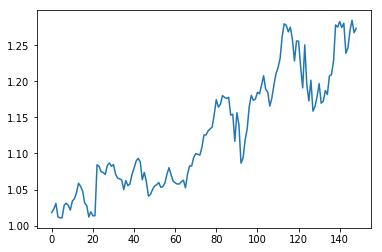

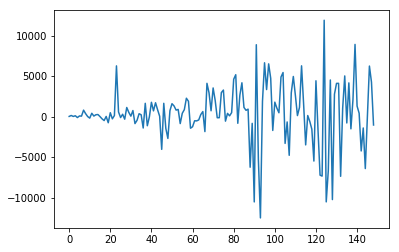

In [105]:

%matplotlib inline
print(len(calcdpurchases),len(prices))
plt.plot(basic_profit)
plt.show()
plt.plot(basic_gain)
plt.show()


In [23]:
import random
#this is the every other day
def multi_agent_mwu(deltas,w0,ettas,prices,n):
    total_purchases=None
    each_Agent_purchase=[]
    for i in range(n):
        each_Agent_purchase.append(np.array(rounded_MWU(deltas,w0,ettas[i],prices,3.0)))
    for i in range(n+1,2*n):
        x=rounded_MWU(deltas,w0,ettas[i],prices,6.0)
        for j,xy in enumerate(x):
            if j%2==0:
                x[j]=[0.0]*deltas.shape[1]
                #print('hi')
        each_Agent_purchase.append(np.array(x))
        
    total_purchases=sum(each_Agent_purchase)
    return total_purchases,each_Agent_purchase



In [24]:
best_percent_gained=0.0
best_mean=None

means=[i/200 for i in range(200)]
for i in range(len(means)):
    ettas=[means[i]+np.random.normal()*.01 for i in range(100)]

    calcdpurchases,eachpurchases=multi_agent_mwu(deltas[:int(.5*len(deltas))],w0,ettas,prices,50)
    calcbank,calcportfolio,last_gain,profit_tracker,gain_tracker=manage_bank_account(calcdpurchases,prices)
    percent=sum(calcportfolio)/-calcbank
    if percent>best_percent_gained:
        best_percent_gained=percent
        best_mean=means[i]
        print(i,best_percent_gained)
print("best mean"+str(best_mean))    

0 1.1094087900909437
1 1.109595237387793
3 1.109734966333099
5 1.1103111512166308
93 1.1103230998690012
148 1.1103656720125716
best mean0.74


In [139]:
deltas=np.array(delta_seq(prices))
w0=[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0]
#w0=[1.0,1.0,1.0,1.0,1.0,1.0]
ettas=[.74+np.random.normal()*.01 for i in range(100)]
#print(ettas)
calcdpurchases,eachpurchases=multi_agent_mwu(deltas[int(.5*len(deltas)):],w0,ettas,prices,50)
calcbank,calcportfolio,last_gain,profit_tracker,gain_tracker=manage_bank_account(calcdpurchases,prices)

In [140]:
print(tickers)
# print("u picked "+str(calcdpurchases[-2])+"in the morning")
# print("morning price"+str(prices[-2]))

def calc_profit(purchase,delta):
    profit=0
    for i in range(len(purchase)):
        if purchase[i]>0:
            profit+=purchase[i]*delta[i]
    return profit
        
profit_last_day=calc_profit(calcdpurchases[-2],deltas[-1])

print("if u chose stocks this morning   "+str(calcdpurchases[-2])+"and overall gain"+str(sum(last_gain)))
print("amount in bank: "+str(calcbank)+"\n amount of money ur holdings are worth "+str(calcportfolio)+" \n how many shares you have of each company "+str(np.array(calcportfolio)/prices[-1])+" \n the net worth of your holdings: "+str(sum(calcportfolio))+ " \n the percent gained: "+str(sum(calcportfolio)/-calcbank))

print("best picks for tmrw :"+str(calcdpurchases[-1]))

['AAPL', 'AMZN', 'COST', 'FB', 'GOOGL', 'INTC', 'MSFT', 'NFLX', 'XLNX']
if u chose stocks this morning   [ 51.  98. 295. 100. 444. -46. 172. 444. 444.]and overall gain157716.941116333
amount in bank: -16545588.963848114
 amount of money ur holdings are worth [1852152.36685181 9079007.93603516 3032963.09709167   48680.8001709
 3374111.5        -222332.77763367 1809370.         1496007.44171143
 1273564.0559082 ] 
 how many shares you have of each company [10371.55531337  5371.65356146 13113.81491309   346.21150672
  3040.69880211 -4508.87794447 16316.80052267  5228.41860756
 13771.23712888] 
 the net worth of your holdings: 21743524.420135498 
 the percent gained: 1.3141583818892637
best picks for tmrw :[ 50. 150. 150. 150. 150.  95. 100.  50. 150.]


In [143]:
multi_profit=profit_tracker
multi_gain=gain_tracker

In [134]:
#ensemble method with different memory lengths
def rounded_MWU_w_memlength(deltas,w0,etta,prices,buy_cap,memlength):
    purchases=rounded_MWU(deltas[:memlength],w0,etta,prices[:memlength],buy_cap)
    for i in range(memlength+1,len(deltas)+1):
        purchase=rounded_MWU(deltas[i-memlength:i],w0,etta,prices,buy_cap)[-1]
        
        purchases.append(purchase)
    
    return purchases
        
def multi_agent_mwu_w_memlength(deltas,w0,ettas,prices,n):
    total_purchases=None
    each_Agent_purchase=[]
    for i in range(n):
        
        each_Agent_purchase.append(np.array(rounded_MWU(deltas,w0,ettas[i],prices,3.0)))
        #print(each_Agent_purchase[-1].shape)
    for i in range(n,2*n):
        x=rounded_MWU_w_memlength(deltas,w0,ettas[i],prices,3.0,i+1)
        #print('hi')
        each_Agent_purchase.append(np.array(x))
        
        
    total_purchases=sum(each_Agent_purchase)
    return total_purchases,each_Agent_purchase


In [31]:
best_percent_gained=0.0
best_mean=None

means=[i/200 for i in range(200)]
for i in range(len(means)):
    ettas=[means[i]+np.random.normal()*.01 for i in range(100)]

    calcdpurchases,eachpurchases=multi_agent_mwu_w_memlength(deltas[:int(.5*len(deltas))],w0,ettas,prices,50)
    calcbank,calcportfolio,last_gain,profit_tracker,gain_tracker=manage_bank_account(calcdpurchases,prices)
    percent=sum(calcportfolio)/-calcbank
    if percent>best_percent_gained:
        best_percent_gained=percent
        best_mean=means[i]
        print(i,best_percent_gained)
print("best mean"+str(best_mean))    

0 1.1144787234740414
1 1.1147894874610829
3 1.1153562221195843
17 1.1155836676561095
42 1.1156479128907422
52 1.1158023494670737
best mean0.26


In [135]:
deltas=np.array(delta_seq(prices))
w0=[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0]
#w0=[1.0,1.0,1.0,1.0,1.0,1.0]
ettas=[best_mean+np.random.normal()*.01 for i in range(100)]
#print(ettas)
calcdpurchases,eachpurchases=multi_agent_mwu_w_memlength(deltas[int(.5*len(deltas)):],w0,ettas,prices,50)
calcbank,calcportfolio,last_gain,profit_tracker,gain_tracker=manage_bank_account(calcdpurchases,prices)

In [136]:
print(tickers)
# print("u picked "+str(calcdpurchases[-2])+"in the morning")
# print("morning price"+str(prices[-2]))

def calc_profit(purchase,delta):
    profit=0
    for i in range(len(purchase)):
        if purchase[i]>0:
            profit+=purchase[i]*delta[i]
    return profit
        
profit_last_day=calc_profit(calcdpurchases[-2],deltas[-1])

print("if u chose stocks this morning   "+str(calcdpurchases[-2])+"and overall gain"+str(sum(last_gain)))
print("amount in bank: "+str(calcbank)+"\n amount of money ur holdings are worth "+str(calcportfolio)+" \n how many shares you have of each company "+str(np.array(calcportfolio)/prices[-1])+" \n the net worth of your holdings: "+str(sum(calcportfolio))+ " \n the percent gained: "+str(sum(calcportfolio)/-calcbank))

print("best picks for tmrw :"+str(calcdpurchases[-1]))

['AAPL', 'AMZN', 'COST', 'FB', 'GOOGL', 'INTC', 'MSFT', 'NFLX', 'XLNX']
if u chose stocks this morning   [100.   0. 300. 300. 300. 100. 200. 300. 300.]and overall gain194147.91178131104
amount in bank: -18461352.614391327
 amount of money ur holdings are worth [ 1575335.65686035 10958732.82763672  2914443.44525146   292084.80102539
  4793694.5         -165696.31568909  1411890.          1111901.65667725
   771456.13540649] 
 how many shares you have of each company [ 8821.45615807  6483.8049088  12601.36397714  2077.26904031
  4320.00576266 -3360.29833856 12732.34744135  3886.00159963
  8341.86967348] 
 the net worth of your holdings: 23663842.70716858 
 the percent gained: 1.2818043835380575
best picks for tmrw :[  0. 300. 300. 300. 300. 297. 200.   0. 300.]


In [111]:
mem_profit=profit_tracker
mem_gain=gain_tracker
print(mem_profit)

[1.439061792102056, 1.4371495492956377, 1.4568431869917866, 1.2234355340843903, 1.1451615812526745, 1.1248856029411254, 1.115954525536058, 1.1020159637883649, 1.0920330585099005, 1.07903993996945, 1.099007272309806, 1.1048771501853145, 1.1182639848143539, 1.143372595957173, 1.132436984557968, 1.1240308547675295, 1.0967493538557462, 1.0857011629570115, 1.0628890102366406, 1.0693769235484423, 1.0592862040091335, 1.0545223598037283, 1.1244223432313232, 1.11842939885937, 1.1075037803400283, 1.104501755565148, 1.1016145040728846, 1.1150671727722776, 1.1182769277446736, 1.1116413869754909, 1.1125331848323912, 1.0969664363637064, 1.0901561130672992, 1.0877864788083775, 1.0852581749526964, 1.07020913790245, 1.0831758066174288, 1.0764268762841056, 1.0798263212730188, 1.093015722639306, 1.1029854186022663, 1.1127522491410682, 1.116090413359319, 1.1099594380142164, 1.0848484650766381, 1.0948369080946685, 1.080455308811146, 1.0589080409144862, 1.0607282777035536, 1.0668778045835987, 1.070756906567

151 9


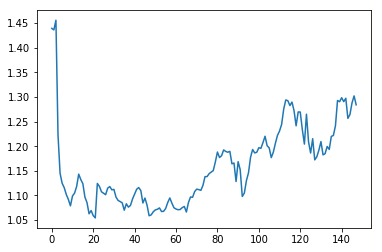

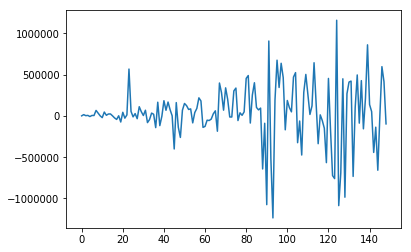

In [94]:
%matplotlib inline
print(len(calcdpurchases),len(prices[0]))
plt.plot(mem_profit)
plt.show()
plt.plot(mem_gain)
plt.show()

In [151]:
def running_average(data, window=3):
    cur_window = []
    rtn = []
    for point in data:
        if len(cur_window) >= window:
            cur_window.pop(0)
        cur_window.append(point)
        rtn.append(sum(cur_window)/len(cur_window))
    return rtn

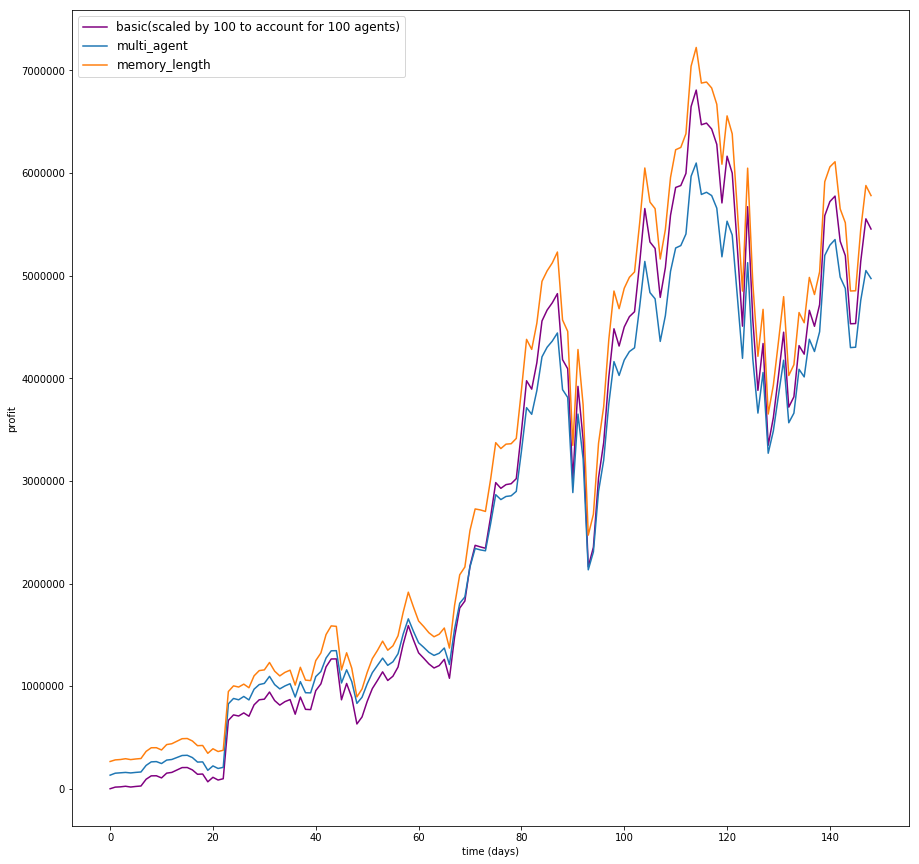

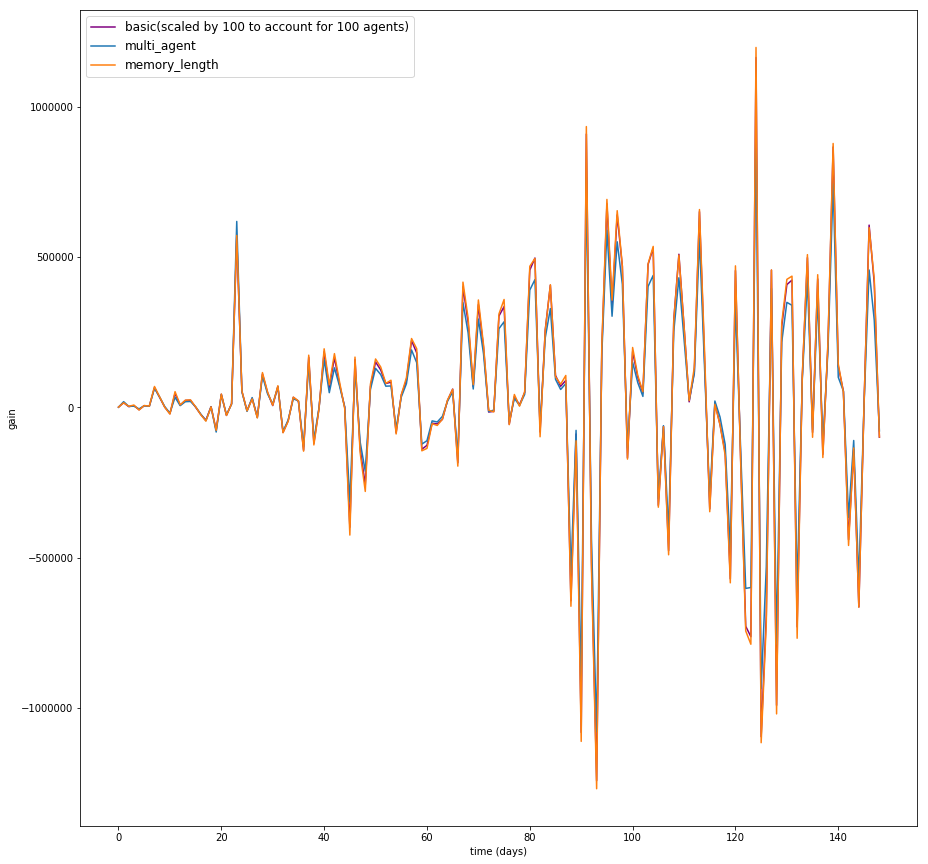

In [57]:
plt.rcParams['figure.figsize'] = [15, 15]
plt.rcParams['legend.fontsize']='large'
plt.xlabel('time (days)')
plt.ylabel('profit')
plt.plot((np.array(basic_profit)*100.0).tolist(),color='purple',label='basic(scaled by 100 to account for 100 agents)')
plt.plot(multi_profit,label='multi_agent')
plt.plot(mem_profit,label='memory_length')
plt.legend()
plt.show()
plt.xlabel('time (days)')
plt.ylabel('gain')
plt.plot((np.array(basic_gain)*100.0).tolist(),color='purple',label='basic(scaled by 100 to account for 100 agents)')
plt.plot(multi_gain,label='multi_agent')
plt.plot(mem_gain,label='memory_length')
plt.legend()
plt.show()


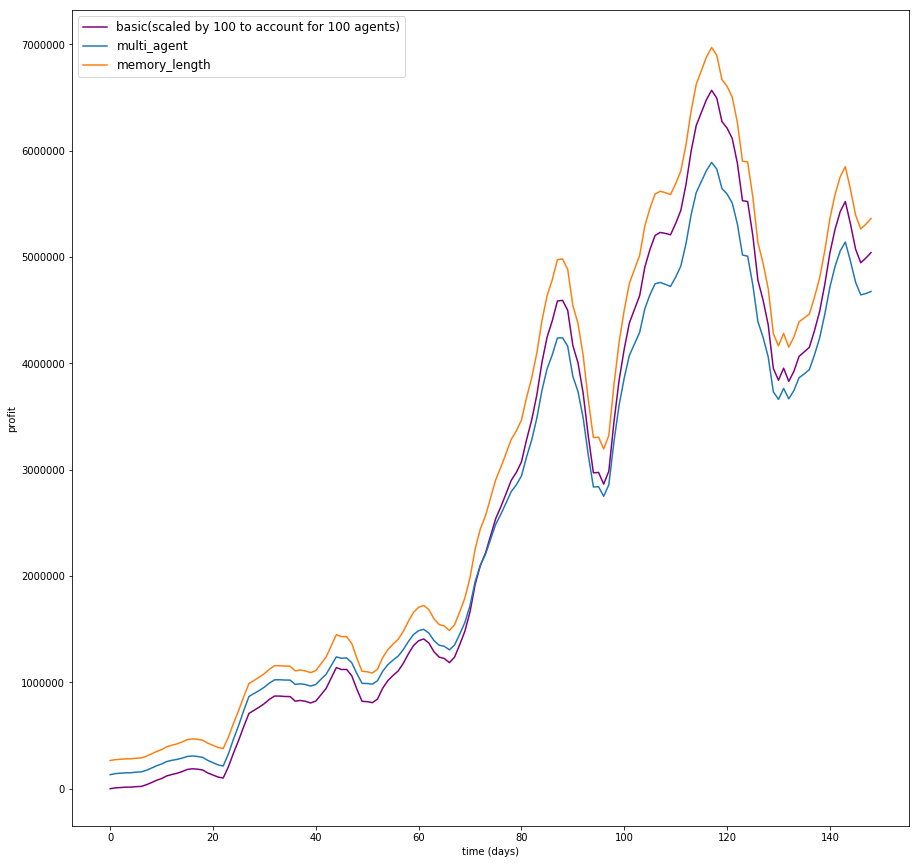

In [64]:

plt.xlabel('time (days)')
plt.ylabel('profit')
plt.plot(running_average((np.array(basic_profit)*100.0).tolist()),color='purple',label='basic(scaled by 100 to account for 100 agents)')
plt.plot(running_average(list(multi_profit)),label='multi_agent')
plt.plot(running_average(list(mem_profit)),label='memory_length')
plt.legend()
plt.show()


now we test our highest percent profit algorithm, multi_agent_mwu on synthetic data on a portfolio consisting of ['aapl','abc'] where the long term trends are approximately the same but the hour the hour data is completely synthesizd by https://github.com/mrocklin/fakestockdata



In [ ]:
from fakestockdata import generate_stocks
generate_stocks(freq=pd.Timedelta(minutes=60))

In [50]:
import os
aapl=[]
abc=[]
for filename in os.listdir('data/generated/aapl'):
    temp=pd.read_csv('data/generated/aapl/'+filename, usecols=[2])
    temp=temp.values.tolist()
    temp=[i[0] for i in temp]
    aapl+=temp
for filename in os.listdir('data/generated/abc'):
    temp=pd.read_csv('data/generated/abc/'+filename, usecols=[2])
    temp=temp.values.tolist()
    temp=[i[0] for i in temp]
    abc+=temp
zipped=np.array(list(zip(aapl,abc)))
print(zipped)

[[ 24.974   3.424]
 [ 24.853   3.41 ]
 [ 25.378   3.435]
 ...
 [454.386  59.398]
 [454.398  59.444]
 [454.37   59.5  ]]


In [51]:
best_percent_gained=0.0
best_mean=None
deltasfake=np.array(delta_seq(zipped))
means=[i/200 for i in range(200)]
w0fake=np.array([1.0,1.0])
for i in range(len(means)):
    ettas=[means[i]+np.random.normal()*.01 for i in range(100)]

    calcdpurchases,eachpurchases=multi_agent_mwu(deltasfake[:int(.5*len(deltasfake))],w0fake,ettas,zipped,50)
    calcbank,calcportfolio,last_gain,profit_tracker,gain_tracker=manage_bank_account(calcdpurchases,zipped)
    percent=sum(calcportfolio)/-calcbank
    if percent>best_percent_gained:
        best_percent_gained=percent
        best_mean=means[i]
        print(i,best_percent_gained)
print("best mean"+str(best_mean))  

0 0.3837634636756056
2 0.3867867689592432
5 0.39126249688036085
9 0.40192651726585815
23 0.4027524801379797
60 0.4079291391416913
best mean0.3


In [115]:
ettas=[best_mean+np.random.normal()*.01 for i in range(100)]
#print(ettas)
calcdpurchases,eachpurchases=multi_agent_mwu(deltasfake[int(.5*len(deltasfake)):],w0fake,ettas,zipped,50)
calcbank,calcportfolio,last_gain,profit_tracker,gain_tracker=manage_bank_account(calcdpurchases,zipped)

In [116]:
def calc_profit(purchase,delta):
    profit=0
    for i in range(len(purchase)):
        if purchase[i]>0:
            profit+=purchase[i]*delta[i]
    return profit
        
#profit_last_day=calc_profit(calcdpurchases[-2],deltas[-1])

print("if u chose stocks this morning   "+str(calcdpurchases[-2])+"and overall gain"+str(sum(last_gain)))
print("amount in bank: "+str(calcbank)+"\n amount of money ur holdings are worth "+str(calcportfolio)+" \n how many shares you have of each company "+str(np.array(calcportfolio)/zipped[-1])+" \n the net worth of your holdings: "+str(sum(calcportfolio))+ " \n the percent gained: "+str(sum(calcportfolio)/-calcbank))

print("best picks for tmrw :"+str(calcdpurchases[-1]))

if u chose stocks this morning   [ -7. 100.]and overall gain66428.40399998703
amount in bank: -42739203.15800003
 amount of money ur holdings are worth [79915717.58800001 35900887.866     ] 
 how many shares you have of each company [175882.46932676 603376.26665546] 
 the net worth of your holdings: 115816605.45400003 
 the percent gained: 2.7098447536760215
best picks for tmrw :[ 83. 345.]


In [117]:
fake_profit=profit_tracker
fake_gain=gain_tracker

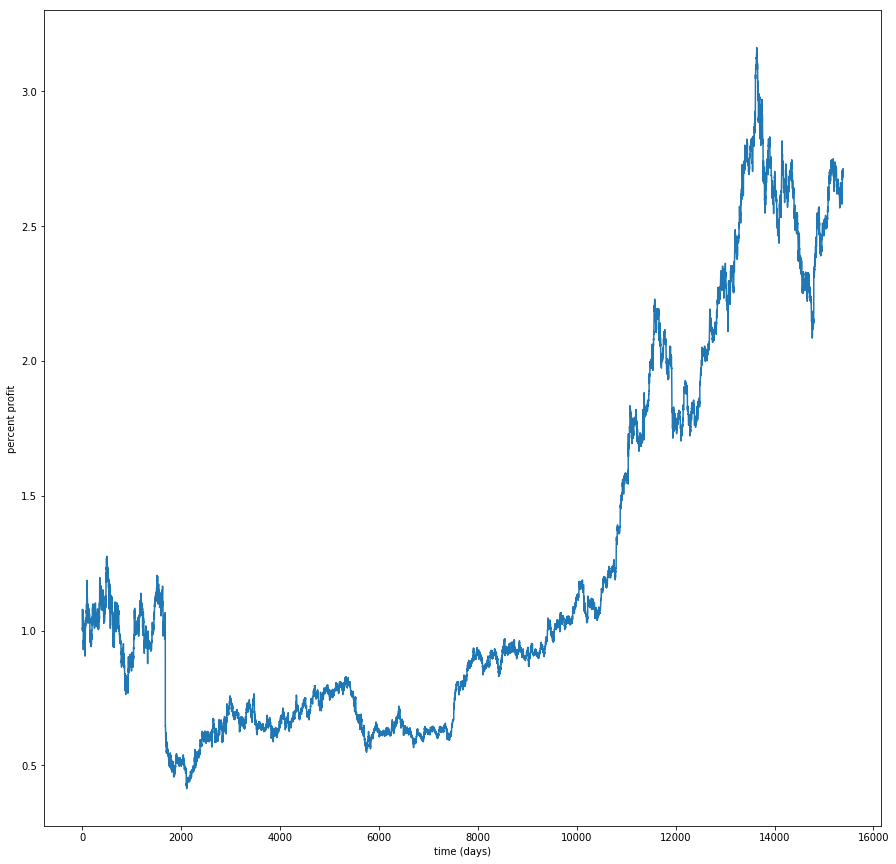

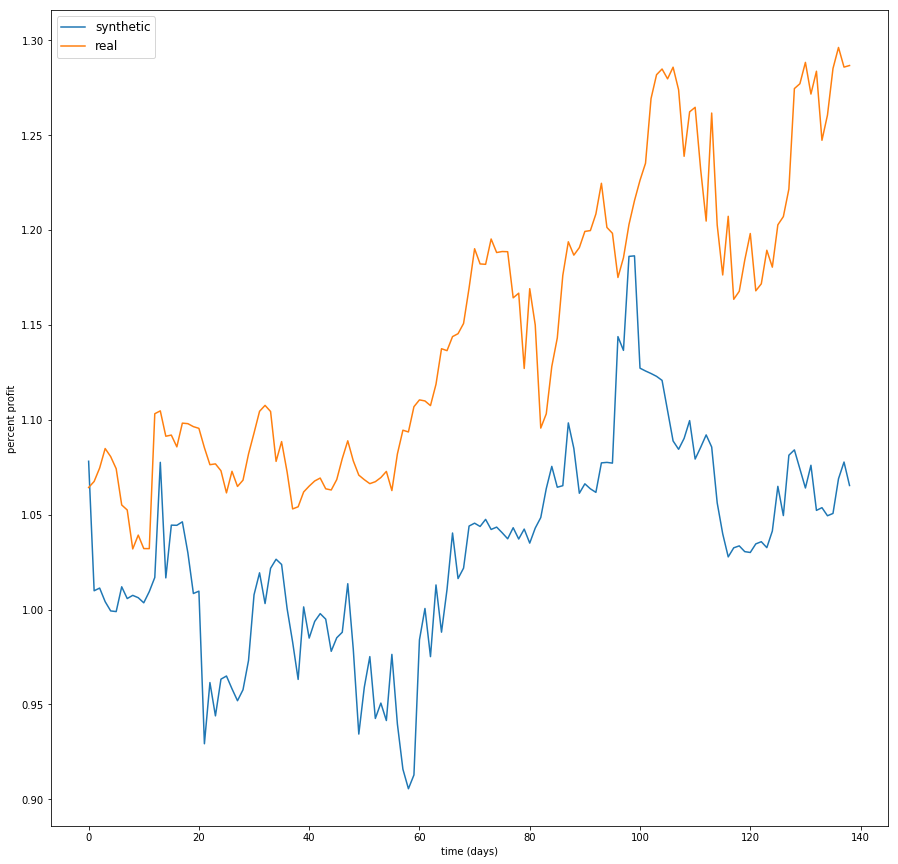

In [127]:
plt.xlabel('time (days)')
plt.ylabel('percent profit')
plt.plot(fake_profit[10:])
plt.show()
plt.xlabel('time (days)')
plt.ylabel('percent profit')
plt.plot(fake_profit[10:len(multi_profit)],label='synthetic')
plt.plot(multi_profit[10:],label='real')
plt.legend()
plt.show()


Now we perform an ablation study and see the results of using just buying eery other day and buying with memory lengths 0,...,100.

In [7]:
def multi_agent_mwu_just_memlength(deltas,w0,ettas,prices,n):
    total_purchases=None
    each_Agent_purchase=[]
    
    for i in range(0,2*n):
        x=rounded_MWU_w_memlength(deltas,w0,ettas[i],prices,3.0,i+1)
        #print('hi')
        each_Agent_purchase.append(np.array(x))
        
        
    total_purchases=sum(each_Agent_purchase)
    return total_purchases,each_Agent_purchase
def multi_eryother_day_mwu(deltas,w0,ettas,prices,n):
    total_purchases=None
    each_Agent_purchase=[]
    
    for i in range(0,2*n):
        x=rounded_MWU(deltas,w0,ettas[i],prices,6.0)
        for j,xy in enumerate(x):
            if j%2==0:
                x[j]=[0.0]*deltas.shape[1]
                #print('hi')
        each_Agent_purchase.append(np.array(x))
        
    total_purchases=sum(each_Agent_purchase)
    return total_purchases,each_Agent_purchase

best_percent_gained_mem=0.0
best_mean_mem=None
best_percent_gained_ery=0.0
best_mean_ery=None

means=[i/100 for i in range(100)]
for i in range(len(means)):
    ettas=[means[i]+np.random.normal()*.01 for i in range(100)]

    calcdpurchases,eachpurchases=multi_agent_mwu_just_memlength(deltas[:int(.5*len(deltas))],w0,ettas,prices,50)
    calcbank,calcportfolio,last_gain,profit_tracker,gain_tracker=manage_bank_account(calcdpurchases,prices)
    percent=sum(calcportfolio)/-calcbank
    if percent>best_percent_gained_mem:
        best_percent_gained_mem=percent
        best_mean_mem_=means[i]
        print("mem "+str(i)+" "+str(best_percent_gained_mem))
    calcdpurchases,eachpurchases=multi_eryother_day_mwu(deltas[:int(.5*len(deltas))],w0,ettas,prices,50)
    calcbank,calcportfolio,last_gain,profit_tracker,gain_tracker=manage_bank_account(calcdpurchases,prices)
    percent=sum(calcportfolio)/-calcbank
    if percent>best_percent_gained_ery:
        best_percent_gained_ery=percent
        best_mean_ery=means[i]
        print("ery "+str(i)+" "+str(best_percent_gained_ery))
print("best mean for mem "+str(best_mean_mem)+" best mean for eryotherday "+str(best_mean_ery))   


In [112]:
deltas=np.array(delta_seq(prices))
w0=[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0]
#w0=[1.0,1.0,1.0,1.0,1.0,1.0]
ettas=[.56+np.random.normal()*.01 for i in range(100)]
#print(ettas)
calcdpurchases,eachpurchases=multi_agent_mwu_just_memlength(deltas[int(.5*len(deltas)):],w0,ettas,prices,50)
calcbank,calcportfolio,last_gain,jusmem_profit,gain_tracker=manage_bank_account(calcdpurchases,prices)


profit_last_day=calc_profit(calcdpurchases[-2],deltas[-1])

print("if u chose stocks this morning   "+str(calcdpurchases[-2])+"and overall gain"+str(sum(last_gain)))
print("amount in bank: "+str(calcbank)+"\n amount of money ur holdings are worth "+str(calcportfolio)+" \n how many shares you have of each company "+str(np.array(calcportfolio)/prices[-1])+" \n the net worth of your holdings: "+str(sum(calcportfolio))+ " \n the percent gained: "+str(sum(calcportfolio)/-calcbank))

print("best picks for tmrw :"+str(calcdpurchases[-1]))

deltas=np.array(delta_seq(prices))
w0=[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0]
#w0=[1.0,1.0,1.0,1.0,1.0,1.0]
ettas=[.17+np.random.normal()*.01 for i in range(100)]
#print(ettas)
calcdpurchases,eachpurchases=multi_eryother_day_mwu(deltas[int(.5*len(deltas)):],w0,ettas,prices,50)
calcbank,calcportfolio,last_gain,ery_profit,gain_tracker=manage_bank_account(calcdpurchases,prices)


profit_last_day=calc_profit(calcdpurchases[-2],deltas[-1])

print("if u chose stocks this morning   "+str(calcdpurchases[-2])+"and overall gain"+str(sum(last_gain)))
print("amount in bank: "+str(calcbank)+"\n amount of money ur holdings are worth "+str(calcportfolio)+" \n how many shares you have of each company "+str(np.array(calcportfolio)/prices[-1])+" \n the net worth of your holdings: "+str(sum(calcportfolio))+ " \n the percent gained: "+str(sum(calcportfolio)/-calcbank))

print("best picks for tmrw :"+str(calcdpurchases[-1]))

if u chose stocks this morning   [ 82.  -1. 298.  61. 299.  76. 119. 300. 292.]and overall gain194914.0714416504
amount in bank: -18770283.730895996
 amount of money ur holdings are worth [ 1415705.25109863 11338475.22998047  3198654.74966431   268787.5609436
  3852856.5           28104.91096497  1615190.          1704038.63360596
  1121660.43878174] 
 how many shares you have of each company [ 7927.56880156  6708.48194866 13830.22642056  1911.58210495
  3472.13663338   569.96370274 14565.69581468  5955.46990713
 12128.68077494] 
 the net worth of your holdings: 24543473.275039673 
 the percent gained: 1.3075707126707399
best picks for tmrw :[  5. 300. 296. 182. 300. 152. 188.  99. 294.]
if u chose stocks this morning   [-235.  500.  303. -400.  481.    0.  309.  -38.  504.]and overall gain183089.44510650635
amount in bank: -21673647.623020172
 amount of money ur holdings are worth [ 4708251.46994019 15658045.05664062  4418837.16860962  -219759.04077148
   469378.25         138977.9847

In [148]:
print(ery_profit[-1])
print(multi_profit[-1])

1.3172868903534114
1.3141583818892637


In [128]:
def multi_agent_mwu_daily(deltas,w0,ettas,prices,n):
    total_purchases=None
    each_Agent_purchase=[]
    for i in range(2*n):
        each_Agent_purchase.append(np.array(rounded_MWU(deltas,w0,ettas[i],prices,3.0)))
    
        
    total_purchases=sum(each_Agent_purchase)
    return total_purchases,each_Agent_purchase


best_percent_gained=0.0
best_mean=None

means=[i/200 for i in range(200)]
for i in range(len(means)):
    ettas=[means[i]+np.random.normal()*.01 for i in range(100)]

    calcdpurchases,eachpurchases=multi_agent_mwu_daily(deltas[:int(.5*len(deltas))],w0,ettas,prices,50)
    calcbank,calcportfolio,last_gain,profit_tracker,gain_tracker=manage_bank_account(calcdpurchases,prices)
    percent=sum(calcportfolio)/-calcbank
    if percent>best_percent_gained:
        best_percent_gained=percent
        best_mean=means[i]
        print(i,best_percent_gained)
print("best mean"+str(best_mean))            

0 1.1148684864958058
4 1.114870631624297
12 1.1149348233741805
14 1.1149691502102421
16 1.1151437547895338
17 1.1152850217269912
31 1.1154878163166904
37 1.1155923504424976
124 1.115686885785047
178 1.115756783152564
best mean0.89


In [137]:
deltas=np.array(delta_seq(prices))
w0=[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0]
#w0=[1.0,1.0,1.0,1.0,1.0,1.0]
ettas=[.17+np.random.normal()*.01 for i in range(100)]
#print(ettas)
calcdpurchases,eachpurchases=multi_agent_mwu_daily(deltas[int(.5*len(deltas)):],w0,ettas,prices,50)
calcbank,calcportfolio,last_gain,daily_profit,gain_tracker=manage_bank_account(calcdpurchases,prices)


profit_last_day=calc_profit(calcdpurchases[-2],deltas[-1])

print("if u chose stocks this morning   "+str(calcdpurchases[-2])+"and overall gain"+str(sum(last_gain)))
print("amount in bank: "+str(calcbank)+"\n amount of money ur holdings are worth "+str(calcportfolio)+" \n how many shares you have of each company "+str(np.array(calcportfolio)/prices[-1])+" \n the net worth of your holdings: "+str(sum(calcportfolio))+ " \n the percent gained: "+str(sum(calcportfolio)/-calcbank))

print("best picks for tmrw :"+str(calcdpurchases[-1]))

if u chose stocks this morning   [-100.  200.    0. -100.  300.    0.  191.  175.  300.]and overall gain197743.22887420654
amount in bank: -21522135.133140564
 amount of money ur holdings are worth [ 3306243.31933594 12648586.51806641  3804028.75906372  -743251.50260925
  2780884.           278489.26956177  2357900.          1486921.74206543
  1675005.17831421] 
 how many shares you have of each company [18514.0737229   7483.6177362  16447.72042175 -5285.90782578
  2506.09105467  5647.7238249  21263.41431128  5196.66486105
 18112.07955788] 
 the net worth of your holdings: 27594807.283798218 
 the percent gained: 1.2821593728080785
best picks for tmrw :[-107.  300.    5. -100.  300.    0.  200.  111.  300.]


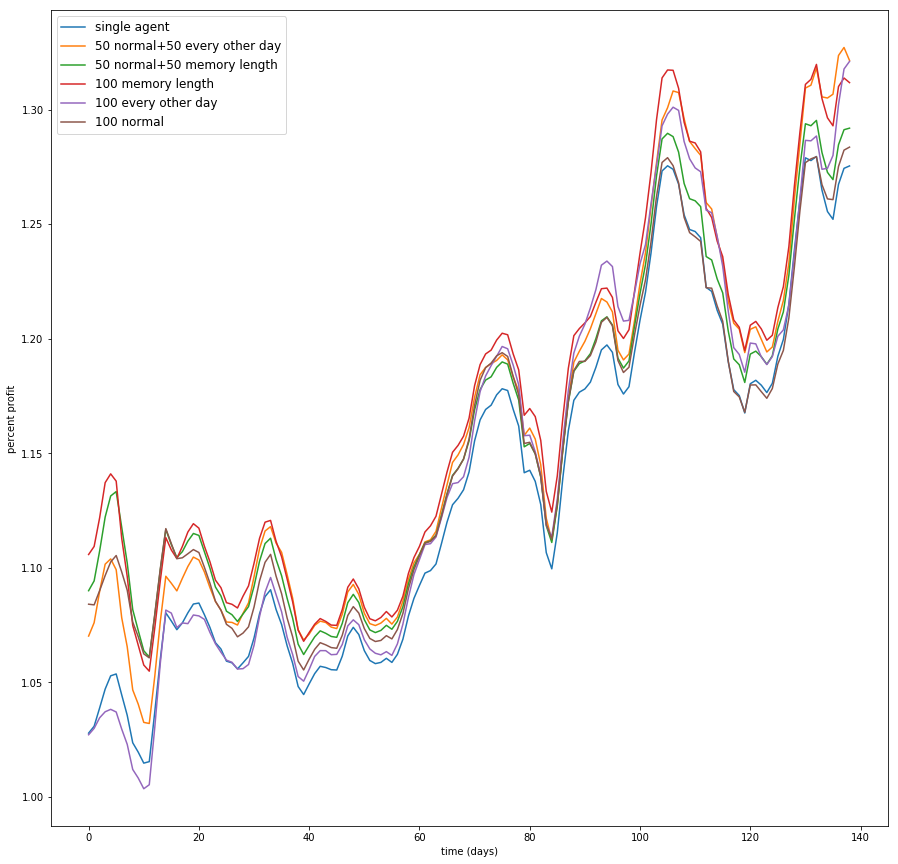

In [152]:
plt.rcParams['figure.figsize'] = [15, 15]
plt.xlabel('time (days)')
plt.ylabel('percent profit')
plt.plot(running_average((np.array(basic_profit)).tolist())[10:],label='single agent')
plt.plot(running_average(list(multi_profit))[10:],label='50 normal+50 every other day')
plt.plot(running_average(list(mem_profit))[10:],label='50 normal+50 memory length')
plt.plot(running_average(list(jusmem_profit))[10:],label='100 memory length')
plt.plot(running_average(list(ery_profit))[10:],label='100 every other day ')
plt.plot(running_average(list(daily_profit))[10:],label='100 normal')
plt.legend()
plt.show()

In [19]:
from pandas_datareader import data
tickers = ['AAPL','AMZN','COST','FB','GOOGL','INTC','MSFT','NFLX','XLNX']
#tickers = ['AMZN','COST','MSFT','NFLX','NVDA','XLNX']

# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2018-1-03'
end_date = '2019-1-03'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = data.DataReader(tickers, 'yahoo', start_date, end_date)
prices_last_3_months=panel_data['Close'].values

In [20]:
def calc_profit(purchase,delta):
    profit=0
    for i in range(len(purchase)):
        if purchase[i]>0:
            profit+=purchase[i]*delta[i]
    return profit

In [21]:
deltas=np.array(delta_seq(prices_last_3_months))
w0=[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0]
#w0=[1.0,1.0,1.0,1.0,1.0,1.0]
ettas=[.17+np.random.normal()*.01 for i in range(100)]
#print(ettas)
calcdpurchases,eachpurchases=multi_eryother_day_mwu(deltas,w0,ettas,prices_last_3_months,50)
calcbank,calcportfolio,last_gain,ery_profit,gain_tracker=manage_bank_account(calcdpurchases,prices_last_3_months)


profit_last_day=calc_profit(calcdpurchases[-2],deltas[-1])

print("if u chose stocks this morning   "+str(calcdpurchases[-2])+"and overall gain"+str(sum(last_gain)))
print("amount in bank: "+str(calcbank)+"\n amount of money ur holdings are worth "+str(calcportfolio)+" \n how many shares you have of each company "+str(np.array(calcportfolio)/prices_last_3_months[-1])+" \n the net worth of your holdings: "+str(sum(calcportfolio))+ " \n the percent gained: "+str(sum(calcportfolio)/-calcbank))

print("best picks for tmrw :"+str(calcdpurchases[-1]))

if u chose stocks this morning   [0. 0. 0. 0. 0. 0. 0. 0. 0.]and overall gain-1478753.967288971
amount in bank: -56089295.727752686
 amount of money ur holdings are worth [ 3209654.92510986 30994285.12524414  5791937.52708435 -1712620.07141113
  1863278.93676758   656538.95476913  3615390.6566391   2964216.13342285
  1436238.75146484] 
 how many shares you have of each company [ 22573.  20659.  28899. -13000.   1817.  14757.  37119.  10930.  17184.] 
 the net worth of your holdings: 48818920.93909073 
 the percent gained: 0.870378568774494
best picks for tmrw :[-600.  -10.  -94. -400.    0.    0.  200.    4.  300.]
